In [4]:
pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 35.3 MB/s eta 0:00:00


In [5]:
import pulp

# Створюємо модель лінійного програмування
model = pulp.LpProblem("Production_Optimization", pulp.LpMaximize)

# Визначаємо змінні
lemonade = pulp.LpVariable("Lemonade", lowBound=0, cat="Integer")
fruit_juice = pulp.LpVariable("Fruit_Juice", lowBound=0, cat="Integer")

# Визначаємо обмеження ресурсів
model += 2 * lemonade + fruit_juice <= 100, "Water_Constraint"
model += lemonade <= 50, "Sugar_Constraint"
model += lemonade <= 30, "Lemon_Juice_Constraint"
model += 2 * fruit_juice <= 40, "Fruit_Puree_Constraint"

# Визначаємо цільову функцію
model += lemonade + fruit_juice

# Розв'язуємо задачу
model.solve()

# Виводимо результати
print(f"Оптимальне виробництво Лимонаду: {int(lemonade.value())}")
print(f"Оптимальне виробництво Фруктового соку: {int(fruit_juice.value())}")
print(f"Максимальна кількість продуктів: {int(lemonade.value() + fruit_juice.value())}")

Оптимальне виробництво Лимонаду: 30
Оптимальне виробництво Фруктового соку: 20
Максимальна кількість продуктів: 50


Цей код створює модель лінійного програмування за допомогою бібліотеки PuLP. Спочатку ми визначаємо змінні lemonade та fruit_juice, які представляють кількість одиниць "Лимонаду" та "Фруктового соку" відповідно.

Потім ми задаємо обмеження на ресурси за допомогою умов, які забезпечують, що споживання ресурсів не перевищує їх наявність.

Далі ми визначаємо цільову функцію, яка максимізує загальну кількість вироблених продуктів.

Після цього ми розв'язуємо задачу за допомогою model.solve() і виводимо результати.



Аналітичне значення інтеграла: 2.666666666666667
Значення інтеграла методом Монте-Карло: 2.667368
Абсолютна різниця: 0.0007013333333332206


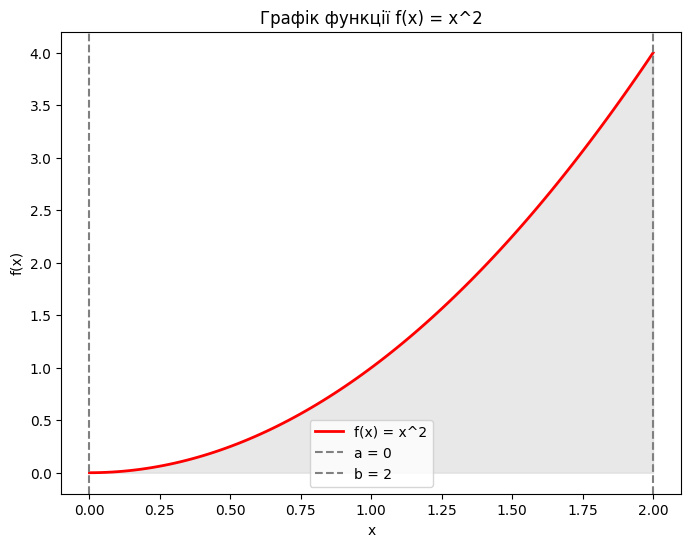

In [7]:
import random
import scipy.integrate as spi
import matplotlib.pyplot as plt
import numpy as np

# Визначення функції та межі інтегрування
def f(x):
    return x ** 2

a = 0  # Нижня межа
b = 2  # Верхня межа

# Обчислення аналітичного значення інтеграла
analytical_result = spi.quad(f, a, b)[0]
print(f"Аналітичне значення інтеграла: {analytical_result}")

# Метод Монте-Карло
def monte_carlo_integration(f, a, b, N):
    area = 0
    for _ in range(N):
        x = random.uniform(a, b)
        y = random.uniform(0, max(f(a), f(b)))
        if y <= f(x):
            area += 1
    area = area / N * (b - a) * max(f(a), f(b))
    return area

# Обчислення інтеграла методом Монте-Карло
N = 1000000  # Кількість випробувань
mc_result = monte_carlo_integration(f, a, b, N)
print(f"Значення інтеграла методом Монте-Карло: {mc_result}")

# Порівняння результатів
print(f"Абсолютна різниця: {abs(analytical_result - mc_result)}")

# Побудова графіка функції
x = np.linspace(a, b, 100)
y = f(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'r', linewidth=2, label='f(x) = x^2')
plt.fill_between(x, y, color='lightgray', alpha=0.5)
plt.axvline(x=a, color='gray', linestyle='--', label=f'a = {a}')
plt.axvline(x=b, color='gray', linestyle='--', label=f'b = {b}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Графік функції f(x) = x^2')
plt.legend()
plt.show()

У цьому коді ми додали побудову графіка функції f(x) = x^2 за допомогою бібліотеки matplotlib. Ми створюємо масив значень x в діапазоні від a до b з певним кроком, обчислюємо відповідні значення функції y = f(x) і будуємо графік за допомогою функції plt.plot. Далі ми заповнюємо область під графіком функції за допомогою plt.fill_between, і додаємо вертикальні лінії для позначення меж інтегрування a та b за допомогою plt.axvline.

Також ми налаштовуємо підписи осей, назву графіка та легенду для зручності інтерпретації результатів.

Після виконання цього коду, ви побачите графік функції f(x) = x^2 на інтервалі від a = 0 до b = 2, заштриховану область під кривою, що відповідає значенню інтеграла, і вертикальні лінії, що позначають межі інтегрування. Також буде виведений аналітичний результат інтеграла, його наближення методом Монте-Карло та абсолютна різниця між ними.